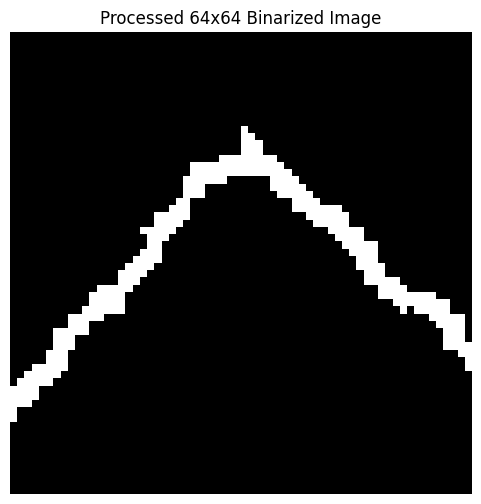

Image saved as NumPy array at: processed_image.npy
Loaded image shape: (64, 64)
Loaded image unique values: [0 1]


In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def process_image_from_folder(folder_path, file_name):
    """
    Load an image from a folder, resize it to 64x64, and binarize it.
    
    Args:
        folder_path (str): Path to the folder containing the image.
        file_name (str): Name of the image file to process.
    
    Returns:
        numpy.ndarray: Processed image with shape (64, 64) and binary values (0 or 1).
    """
    # Build full path to the image file
    file_path = os.path.join(folder_path, file_name)
    
    # Open the image
    with Image.open(file_path) as img:
        # Ensure the image is in grayscale mode
        img = img.convert('L')
        
        # Resize the image to 64x64
        resized_image = img.resize((64, 64), Image.Resampling.LANCZOS)
        
        # Convert image to numpy array and normalize to range [0, 1]
        resized_array = np.array(resized_image) / 255.0
        
        # Binarize the image: 0 if < 0.3, 1 otherwise
        binarized_image = (resized_array >= 0.3).astype(np.uint8)
    
    return binarized_image

def display_image(image, title="Image"):
    """
    Display the image using matplotlib.
    
    Args:
        image (numpy.ndarray): Image to display.
        title (str): Title for the displayed image.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def save_numpy_array(image, save_path):
    """
    Save the numpy array as a .npy file.
    
    Args:
        image (numpy.ndarray): Image to save.
        save_path (str): Path to save the .npy file.
    """
    np.save(save_path, image)
    print(f"Image saved as NumPy array at: {save_path}")

# Example usage
if __name__ == "__main__":
    # Path to the folder containing the image
    folder_path = "expanded/0"
    
    # Name of the image file (example: replace with your file name)
    file_name = "Volker_DSC01612_0_0_1824_2736.jpg"
    
    # Process the image
    processed_image = process_image_from_folder(folder_path, file_name)
    
    # Display the processed image
    display_image(processed_image, title="Processed 64x64 Binarized Image")
    
    # Save the image as a NumPy array
    save_path = "processed_image.npy"
    save_numpy_array(processed_image, save_path)
    
    # Load the saved NumPy array (to verify)
    loaded_image = np.load(save_path)
    print("Loaded image shape:", loaded_image.shape)
    print("Loaded image unique values:", np.unique(loaded_image))
